In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go

# Data Collection and Preprocessing

The dataset "nutrients_csvfile.csv" was downloaded from [Kaggle](https://www.kaggle.com/datasets/niharika41298/nutrition-details-for-most-common-foods). 

In [2]:
nutrients=pd.read_csv("nutrients_csvfile.csv")
nutrients

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


# Data Cleaning and Preprocessing

Replacing the 't' values in the numerical columns with 0.

In [3]:
nutrients.Category.unique()

array(['Dairy products', 'Fats, Oils, Shortenings', 'Meat, Poultry',
       'Fish, Seafood', 'Vegetables A-E', 'Vegetables F-P',
       'Vegetables R-Z', 'Fruits A-F', 'Fruits G-P', 'Fruits R-Z',
       'Breads, cereals, fastfood,grains', 'Soups', 'Desserts, sweets',
       'Jams, Jellies', 'Seeds and Nuts', 'Drinks,Alcohol, Beverages'],
      dtype=object)

In [23]:
nutrients.Calories.unique()

array(['660', '360', '127', '345', '1,373', '515', '290', '165', '690',
       '235', '128', '275', '285', '300', '170', '430', '240', '195',
       '70', '226', '105', '150', '220', '120', '100', '113', '665',
       '992', '806', '110', '125', '60', '75', '470', '95', '245', '185',
       '390', '330', '115', '480', '140', '370', '314', '260', '310',
       '475', '265', '305', '87', '90', '200', '135', '182', '211', '92',
       '155', '231', '180', '104', '844', '18', '25', '250', '230', '17',
       '27', '1', '45', '32', '40', '20', '30', '5', '51', '6', '80',
       '10', '48', '212', '14', '13', '12', '22', '2', '66', nan, '53',
       '255', '268', '145', '26', '35', '50', '15', '9', '55', '85', '65',
       '530', '505', '130', '160', '405', '72', '112', '205', '57', '385',
       '242', '54', '117', '1,225', '1,100', '460', '400', '152', '748',
       '677', '692', '132', '411', '102', '210', '217', '103', '190',
       '24', '147', '175', '374', '420', '98', '340', '770', '

In [5]:
nutrients['Calories'] = nutrients['Calories'].replace('8-44', '844')

In [22]:
nutrients.Protein.unique()

array(['32', '36', '9', '16', '89', '27', '30', '8', '24', '18', '13',
       '6', '4', '2', '38', '14', '7', '12', '0', '114', '3', '23', '21',
       '20', '22', '19', '15', '25', '28', '26', '232', '17', '1', '11',
       '5', '-1', '39', '48', '10'], dtype=object)

In [21]:
nutrients.Fat.unique()

array(['40', '0', '5', '20', '42', '28', '10', '24', '11', '4', '14',
       '18', '15', '44', '6', '19', '9', '8', '12', '16', '115', '100',
       '110', '91', '55', '17', '36', '27', '35', '23', '21', '22', '13',
       '1', '2', '233', '7', '25', '3', '38', '47', '32', '26'],
      dtype=object)

In [20]:
nutrients['Fat'] = nutrients['Fat'].replace("t'", '0')

In [19]:
nutrients['Sat.Fat'].unique()

array(['36', '0', '4', '18', '23', '24', '8', '22', '10', '3', '9', '11',
       '16', '13', '27', '5', '17', '7', '14', '116', '88', '92', '76',
       '2', nan, '15', '35', '25', '12', '33', '21', '19', '40', '234',
       '1', '6', '28', '31'], dtype=object)

In [18]:
nutrients.Fiber.unique()

array(['0', '1.4', '1', '117', '235', '2', '0.5', '0.8', '3.0', '2.5',
       '0.3', '1.9', '1.7', '1.2', '1.3', '0.9', '1.6', '0.2', '3.2',
       '1.0', '0.6', '1.5', '2.4', '3', '0.1', '2.2', '1.8', '0.4', '0.7',
       '0.40', '2.6', '0.70', '1.80', '6.60', '2.20', '3.6', '5', '0.10',
       '9.00', '67.50', '0.31', '0.30', '8', '2.9', '2.8', '4.6', '0.50',
       '1.20', '2.50', '4.40', '0.60', '0.20', '10', '1.1', '3.1'],
      dtype=object)

In [17]:
nutrients['Fiber'] = nutrients['Fiber'].replace('a', '0')

In [16]:
nutrients.Carbs.unique()

array(['48', '52', '13', '24', '119', '39', '42', '11', '70', '26', '40',
       '28', '29', '32', '5', '3', '6', '0', '1', '118', '2', '15',
       '2.30', '8', '236', '10', '37', '0.80', '12', '7', '9', '4', '21',
       '41', '16', '38', '18', '22', '20', '33', '14', '19', '23', '36',
       '80', '34', '57', '50', '65', '142', '134', '30', '44', '112',
       '108', '25', '78', '55', '81', '45', '82', '98', '60', '229',
       '216', '27', '74', '84', '79', '154', '150', '35', '56', '31',
       '17', '53', '62', '199', '210'], dtype=object)

In [15]:
nutrients['Calories'] = nutrients['Calories'].replace('t', '0')
nutrients['Protein'] = nutrients['Protein'].replace('t', '0')
nutrients['Fat'] = nutrients['Fat'].replace('t', '0')
nutrients['Sat.Fat'] = nutrients['Sat.Fat'].replace('t', '0')
nutrients['Fiber'] = nutrients['Fiber'].replace('t', '0')
nutrients['Carbs'] = nutrients['Carbs'].replace('t', '0')

Since there are commas in the values, they must be removed before converting them to floats.

In [24]:
nutrients.Category = nutrients.Category.replace(['Vegetables A-E','Vegetables F-P', 'Vegetables R-Z'], 'Vegetables')
nutrients.Category = nutrients.Category.replace(['Fruits A-F', 'Fruits G-P', 'Fruits R-Z'], 'Fruits')

# Duplicates

In [32]:
duplicates = nutrients[nutrients.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Food, Measure, Grams, Calories, Protein, Fat, Sat.Fat, Fiber, Carbs, Category]
Index: []


# Null Value Handling

In [25]:
nutrients.isnull().sum() * 100 / len(nutrients)

Food        0.000000
Measure     0.000000
Grams       0.000000
Calories    0.298507
Protein     0.000000
Fat         0.000000
Sat.Fat     0.597015
Fiber       0.000000
Carbs       0.000000
Category    0.000000
dtype: float64

In [26]:
null_rows = nutrients[nutrients.isnull().any(axis=1)]

In [27]:
null_rows

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
42,Salt pork,2 oz.,60,470,3,55,NaN,0,0,"Meat, Poultry"
100,Beetroots,1 cup,165,1,12,0,NaN,0,0.80,Vegetables
134,Frozen peas,1 cup,100,NaN,5,0,0,1.8,12,Vegetables


In [28]:
nutrients = nutrients.dropna()

In [29]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      332 non-null    object
 1   Measure   332 non-null    object
 2   Grams     332 non-null    object
 3   Calories  332 non-null    object
 4   Protein   332 non-null    object
 5   Fat       332 non-null    object
 6   Sat.Fat   332 non-null    object
 7   Fiber     332 non-null    object
 8   Carbs     332 non-null    object
 9   Category  332 non-null    object
dtypes: object(10)
memory usage: 28.5+ KB


In [ ]:
nutrients.columns

In [30]:
nutrients['Calories'] = nutrients['Calories'].str.replace(',', '').astype(float)
nutrients['Protein'] = nutrients['Protein'].str.replace(',', '').astype(float)
nutrients['Fat'] = nutrients['Fat'].str.replace(',', '').astype(float)
nutrients['Carbs'] = nutrients['Carbs'].str.replace(',', '').astype(float)
nutrients['Sat.Fat'] = nutrients['Sat.Fat'].str.replace(',', '').astype(float)
nutrients['Fiber'] = nutrients['Fiber'].str.replace(',', '').astype(float)

/var/folders/nt/6lv1078n1zb5x4lh7zpqbqm00000gn/T/ipykernel_55034/3620476583.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nt/6lv1078n1zb5x4lh7zpqbqm00000gn/T/ipykernel_55034/3620476583.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nt/6lv1078n1zb5x4lh7zpqbqm00000gn/T/ipykernel_55034/3620476583.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [34]:
nutrients['Grams'] = nutrients['Grams'].str.replace(',', '').astype(float)

/var/folders/nt/6lv1078n1zb5x4lh7zpqbqm00000gn/T/ipykernel_55034/1506632645.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      332 non-null    object 
 1   Measure   332 non-null    object 
 2   Grams     332 non-null    float64
 3   Calories  332 non-null    float64
 4   Protein   332 non-null    float64
 5   Fat       332 non-null    float64
 6   Sat.Fat   332 non-null    float64
 7   Fiber     332 non-null    float64
 8   Carbs     332 non-null    float64
 9   Category  332 non-null    object 
dtypes: float64(7), object(3)
memory usage: 28.5+ KB


In [74]:
nutrients.columns

Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs', 'Category'],
      dtype='object')

# Basic Descriptive Statistics

In [49]:
nutrients.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,143.527108,190.984940,8.599398,8.451807,6.457831,2.384970,25.169578
std,139.194736,187.336934,17.805064,19.711379,18.542220,16.126211,35.936783
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,75.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,108.000000,133.500000,3.000000,1.000000,0.000000,0.200000,14.000000
75%,200.000000,250.000000,12.000000,10.000000,8.000000,1.000000,31.000000
max,1419.000000,1373.000000,232.000000,233.000000,234.000000,235.000000,236.000000


# Data Quality Assessment

We can see that the min of "protein" is -1 which is not possible. 

In [37]:
nutrients[nutrients.Protein == -1]

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
141,French-fried,10 pieces,60.0,155.0,-1.0,7.0,3.0,0.4,20.0,Vegetables


In [41]:
nutrients[nutrients.Food == 'Potato chips']

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
146,Potato chips,10,20.0,110.0,1.0,7.0,4.0,0.0,10.0,Vegetables


In [42]:
# filtering the two observations
filtered_data = nutrients[nutrients['Food'].isin(['French-fried', 'Potato chips'])]
filtered_data


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
141,French-fried,10 pieces,60.0,155.0,-1.0,7.0,3.0,0.4,20.0,Vegetables
146,Potato chips,10,20.0,110.0,1.0,7.0,4.0,0.0,10.0,Vegetables


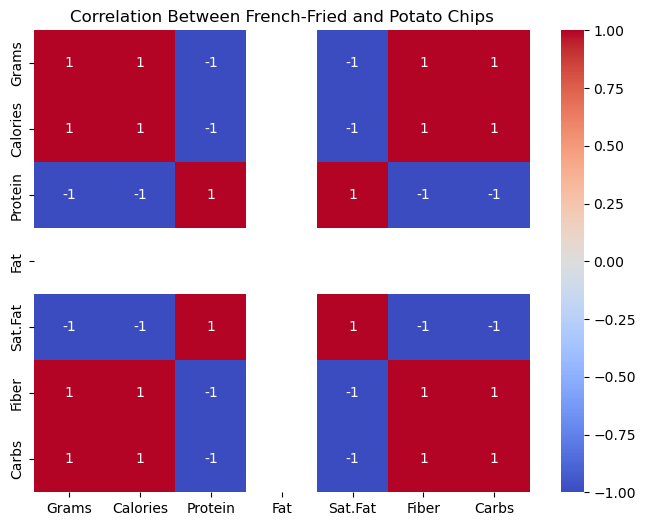

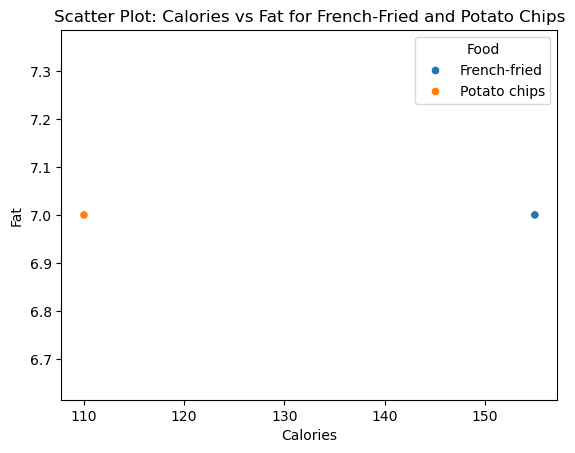

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = filtered_data.drop(columns=['Food', 'Measure', 'Category']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between French-Fried and Potato Chips')
plt.show()

sns.scatterplot(x='Calories', y='Fat', hue='Food', data=filtered_data)
plt.title('Scatter Plot: Calories vs Fat for French-Fried and Potato Chips')
plt.show()


In [48]:
nutrients['Protein'] = nutrients['Protein'].replace(-1, 2)

/var/folders/nt/6lv1078n1zb5x4lh7zpqbqm00000gn/T/ipykernel_55034/2440798368.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
from scipy.stats import zscore

def detect_outliers_zscore(data, columns, threshold=3):
    outliers = pd.DataFrame()
    for column in columns:
        z_scores = np.abs(zscore(data[column].dropna()))  # Calculate Z-scores, ignoring NaNs
        outliers_in_col = data[z_scores > threshold]
        outliers = pd.concat([outliers, outliers_in_col])
    
    return outliers.drop_duplicates()

In [51]:
numeric_columns = ['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Carbs', 'Fiber']

In [54]:
outliers_zscore = detect_outliers_zscore(nutrients, numeric_columns)
print("Outliers detected using Z-score method:")
outliers_zscore

Outliers detected using Z-score method:


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
4,Fortified milk,6 cups,1419.0,1373.0,89.0,42.0,23.0,1.4,119.0,Dairy products
33,Lard,1/2 cup,110.0,992.0,0.0,110.0,92.0,0.0,0.0,"Fats, Oils, Shortenings"
34,Margarine,1/2 cup,112.0,806.0,0.0,91.0,76.0,0.0,0.0,"Fats, Oils, Shortenings"
91,Artichoke,1 large,100.0,844.0,2.0,0.0,0.0,2.0,10.0,Vegetables
223,"White, 20 slices, or",1-lb. loaf,454.0,1225.0,39.0,15.0,12.0,9.0,229.0,"Breads, cereals, fastfood,grains"
224,Whole-wheat,1-lb. loaf,454.0,1100.0,48.0,14.0,10.0,67.5,216.0,"Breads, cereals, fastfood,grains"
305,Puddings Sugar,1 cup,200.0,770.0,0.0,0.0,0.0,0.0,199.0,"Desserts, sweets"
307,"Brown, firm-packed, dark sugar",1 cup,220.0,815.0,0.0,0.0,0.0,0.0,210.0,"Jams, Jellies"
30,Butter,1/2 cup,112.0,113.0,114.0,115.0,116.0,117.0,118.0,"Fats, Oils, Shortenings"
31,Butter,1/4 lb.,112.0,113.0,114.0,115.0,116.0,117.0,118.0,"Fats, Oils, Shortenings"


In [71]:
outliers_zscore = detect_outliers_zscore(nutrients, numeric_columns)

# Step 7: Interactive Boxplots using Plotly
def plot_interactive_boxplot(data, column): 

    fig = go.Figure()

    fig.add_trace(go.Box(x=data[column], name=column, boxmean='sd', marker_color='blue'))
    fig.update_layout(title=f'Interactive Boxplot of {column} with Potential Outliers', 
                      yaxis_title=column, 
                      boxmode='group', 
                      showlegend=True)
    fig.show()

# Step 8: Create interactive boxplots for each numeric column
for column in numeric_columns:
    plot_interactive_boxplot(nutrients, column)

# Optional: Display detected outliers in an interactive table
def show_outliers_interactive(outliers, method_name):
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(outliers.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[outliers[col] for col in outliers.columns],
                   fill_color='lavender',
                   align='left'))
    ])
    fig.update_layout(title=f"Outliers Detected using {method_name}")
    fig.show()

In [73]:
nutrients.to_csv("nutrition_cleaned.csv", index=False)